In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

%matplotlib inline
sns.set(rc={'figure.figsize': (18, 6)})

import warnings
warnings.filterwarnings('ignore')

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

In [53]:
#load diabetes data and convert to dataframe
diabetes = load_diabetes()

In [54]:
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes['target']

In [55]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


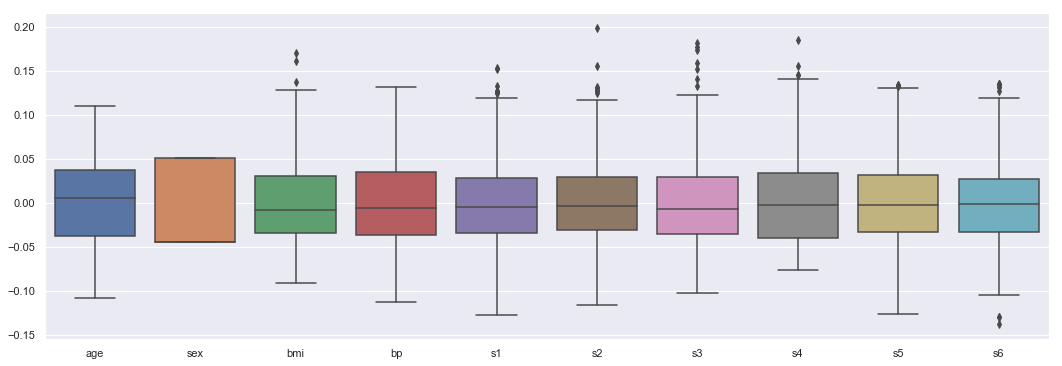

In [56]:
#Boxplot dataframe except for Target column
df_wo_target = df.loc[:,df.columns !='target']
sns.boxplot(data=df_wo_target)

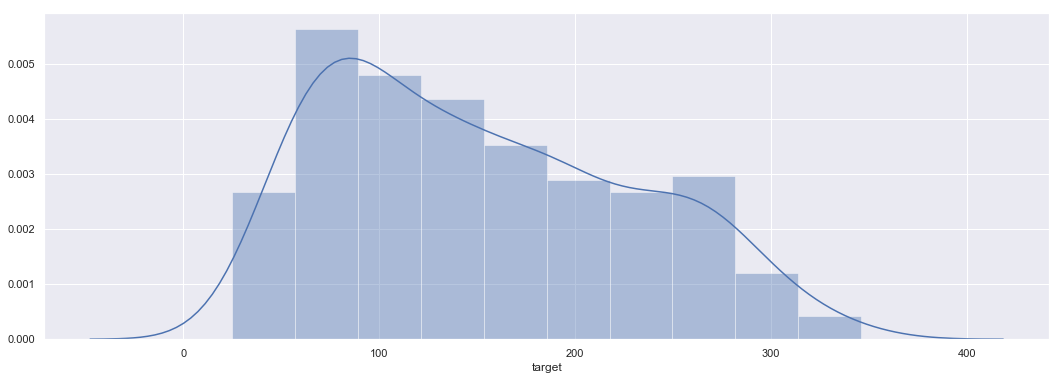

In [57]:
#Distribution of Target column
sns.distplot(df['target'])

In [58]:
#Create X with predictor variables and y with the target variable
y = df['target']
X = df[['age', 'sex','bmi', 'bp','s1','s2','s3','s4','s5','s6']]

In [59]:
#Verify the shape of X and y
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (442, 10)
y shape: (442,)


In [60]:
#create train/test partitions using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(309, 10) (309,)
(133, 10) (133,)


In [61]:
#create Linear Regression object
lm = LinearRegression()

In [62]:
#fit with X_train and y_train
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  -8.02566358 -308.83945001  583.63074324  299.9976184  -360.68940198
   95.14235214  -93.03306818  118.15005596  662.12887711   26.07401648]


In [64]:
#predict using X_test
predictions = lm.predict( X_test)

In [65]:
# calculate these metrics by hand
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, predictions))
print('Variance Score (R2):', r2_score(y_test, predictions))

Mean Absolute Error (MAE): 46.02195139569827
Variance Score (R2): 0.45767674177195616


Text(0, 0.5, 'Total Delay Predicted')

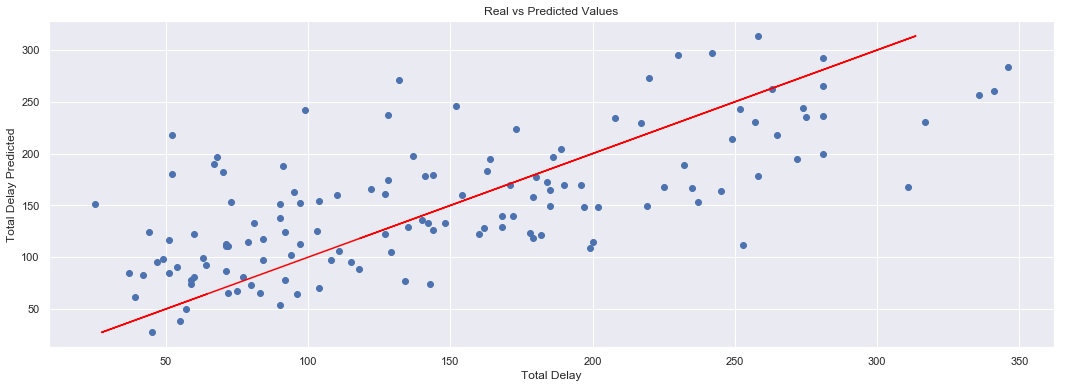

In [66]:
#Create a scatterplot of the real test values versus the predicted values.
plt.scatter(y_test,predictions)
plt.plot(predictions, predictions, color='red')
plt.title('Real vs Predicted Values')
plt.xlabel('Total Delay')
plt.ylabel('Total Delay Predicted')

In [67]:
#Cross validation using 10 k-fold

from sklearn.model_selection import KFold, cross_val_score

n_folds = 10    
kf = KFold(shuffle=True)

scores = cross_val_score(lm, X_test, y_test, scoring="neg_mean_absolute_error", cv=kf)

print('MAE: {}'.format(-scores))
print('MAE_mean: {}'.format(-scores.mean()))

MAE: [46.70407891 44.06757792 48.29748666]
MAE_mean: 46.356381165863986
